## **그리디 (Greedy)**
 - 그리디 알고리즘은 탐욕법이라고도 하며, <span style="color:red">**현재 상황에서 지금 당장 좋은 것만 고르는 방법**</span>을 의미한다.
 - <u>매 순간 가장 좋아 보이는 것만 선택하며, 현재의 선택이 나중에 미칠 영향에 대해서는 고려하지 않는다.</u>

 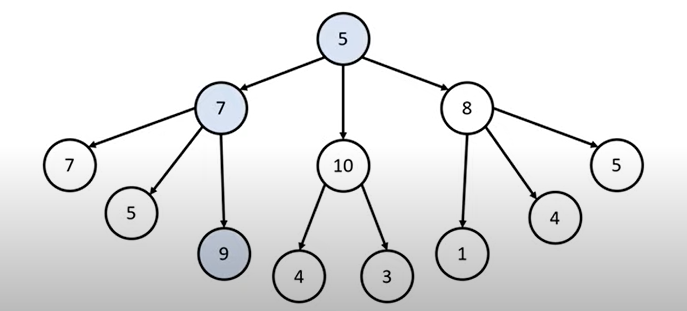

 위 그림은 트리에서 루트 노드부터 거쳐가는 노드의 합을 최대로 하는 방법이다. ***(5 + 7 + 9 = 21)***
 <br>여기에 그리디 알고리즘을 적용하면 어떨까?

 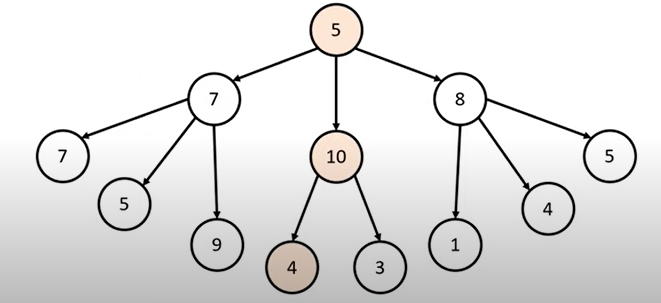

 이처럼 그리디 알고리즘은 당장 가장 큰 수만 찾아가므로 ***(5 + 10 + 4 = 19)*** 가 된다.

 - 특징
  1. 위와 같은 이유로 그리디 알고리즘을 사용하였을 때 <span style="color:red">**최적해를 찾을 수 없을 가능성**</span>이 더 크다.
  2. 하지만 그리디 해법의 <span style="color:red">**정당성이 보장**</span>된다면 매우 효과적이고 직관적이다.

1339번 단어 수학 <span style="color:red">실패</span> - 2025.04.21

In [ ]:
# 어떤 알파벳이 숫자 몇인지는 중요하지 않음.
# 자릿수마다 알파벳의 우선순위를 지정해주고 높은 순으로 9~0까지 곱해주면 된다.
# 아래는 예제 2 (2, GCF, ACDEB)의 우선순위의 예시
# A = 10000
# B = 1
# C = 1000 + 10 = 1010
# D = 100
# E = 10
# F = 1
# G = 100
n = int(input())
word = [list(input()) for _ in range(n)]
alph = dict()

for i in range(n): # 우선순위 매기기
    for j in range(len(word[i])):
        if word[i][j] not in alph.keys():
            alph[word[i][j]] = 10**(len(word[i]) - j - 1)
        else:
            alph[word[i][j]] += 10**(len(word[i]) - j - 1)

# 우선순위 높은 순으로 정렬
alph_priority = sorted(list(alph.values()), reverse=True)

# 우선순위 순으로 9부터 곱해서 더해주기
num = 9
ans = 0
for i in range(len(alph_priority)):
    ans += num * alph_priority[i]
    num -= 1

print(ans)

14888번 연산자 끼워넣기 <span style="color:green">성공</span> - 2025.04.22

In [ ]:
def dfs(depth):
    global ans_min, ans_max

    if depth == len(oper_list):
        ans_min = min(ans_min, check_sum())
        ans_max = max(ans_max, check_sum())
        return
    
    prev_oper = ''
    for i in range(len(oper_list)):
        if prev_oper != oper_list[i] and not visited[i]:
            visited[i] = True
            tmp.append(oper_list[i])
            prev_oper = oper_list[i]
            dfs(depth + 1)
            tmp.pop()
            visited[i] = False

def check_sum():
    x = a[0]
    for i in range(len(tmp)):
        if tmp[i] == '+':
            x += a[i + 1]
        elif tmp[i] == '-':
            x -= a[i + 1]
        elif tmp[i] == '*':
            x *= a[i + 1]
        elif tmp[i] == '/':
            x = int(x / a[i + 1])
    return x

n = int(input())
a = list(map(int, input().split()))
oper_cnt = list(map(int, input().split()))
oper = ['+', '-', '*', '/']
oper_list = []
for i in range(4):
    for _ in range(oper_cnt[i]):
        oper_list.append(oper[i])
visited = [False for _ in range(len(oper_list))]

ans_min = 1e10
ans_max = -1e10 # 처음에 바보같이 0으로 초기화해서 계속 틀림...
tmp = []
dfs(0)

print(ans_max)
print(ans_min)